In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_rawdata(name, multiplier):
    data = pd.read_excel(name+'.xls', index_col=0, skiprows=0, header=5)
    data = data.reset_index()
    data.columns = ['Date', 'Inverter 1', 'Inverter 2']
    data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%Y-%m-%d %H:%M')
    result = pd.DataFrame(columns = ['Date', 'Combined Data']) 
    result['Date'] = data['Date']
    result['Combined Data'] = data['Inverter 1']*multiplier + data['Inverter 2']*multiplier
    result = result.set_index(pd.DatetimeIndex(result['Date']))
    result = result.drop(['Date'], axis=1)
    
    result['Day'] = result.index.dayofyear
    result['Month'] = result.index.month
    result['Quarter'] = result.index.quarter
    result['Hour'] = result.index.hour
    result['Year'] = result.index.year
    return result

In [3]:
def combine_power():
    power_all = get_rawdata('2008',0.001)
    power_all = power_all.append(get_rawdata('2009',0.001))
    power_all = power_all.append(get_rawdata('2010',0.001))
    power_all = power_all.append(get_rawdata('2011',0.001))
    power_all = power_all.append(get_rawdata('2012',0.001))
    power_all = power_all.append(get_rawdata('2013',0.01))
    power_all = power_all.append(get_rawdata('2014',0.01))
    power_all = power_all.append(get_rawdata('2015',0.01))
    power_all = power_all.append(get_rawdata('2016',0.01))
    power_all = power_all.append(get_rawdata('2017',0.01))
    power_all = power_all.append(get_rawdata('2018',0.01))
    power_all = power_all.append(get_rawdata('2019',0.01))
    return power_all
    

In [5]:
energy = get_rawdata('2008-2019', 0.001)

[Text(0, 0.5, 'Energy [kWh]')]

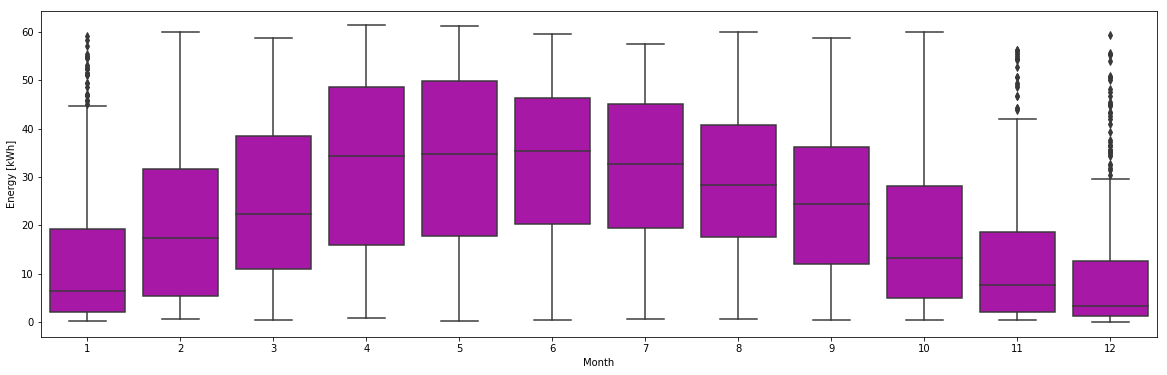

In [6]:
plt.figure(figsize=(20, 6))
ax = sns.boxplot(x="Month", y="Combined Data", palette=["m"], data=energy)
ax.set(ylabel='Energy [kWh]')

[Text(0, 0.5, 'Energy [kWh]')]

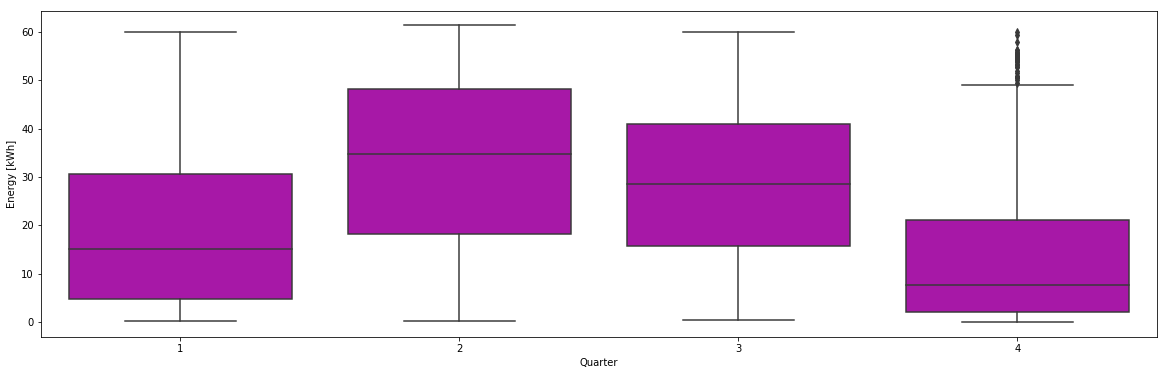

In [7]:
plt.figure(figsize=(20, 6))
ax = sns.boxplot(x="Quarter", y="Combined Data", palette=["m"], data=energy)
ax.set(ylabel='Energy [kWh]')

[Text(0, 0.5, 'Energy [kWh]')]

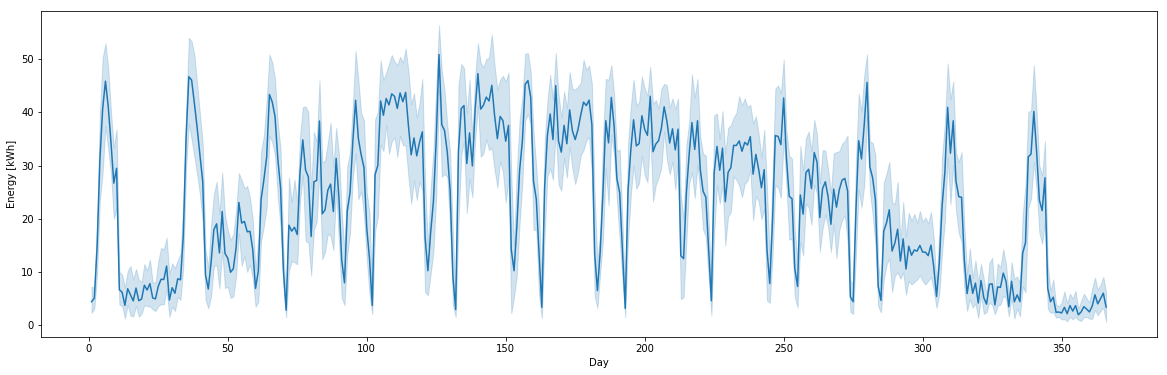

In [8]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x="Day", y="Combined Data", palette=["g"], data=energy)
ax.set(ylabel='Energy [kWh]')

[Text(0, 0.5, 'Energy [kWh]')]

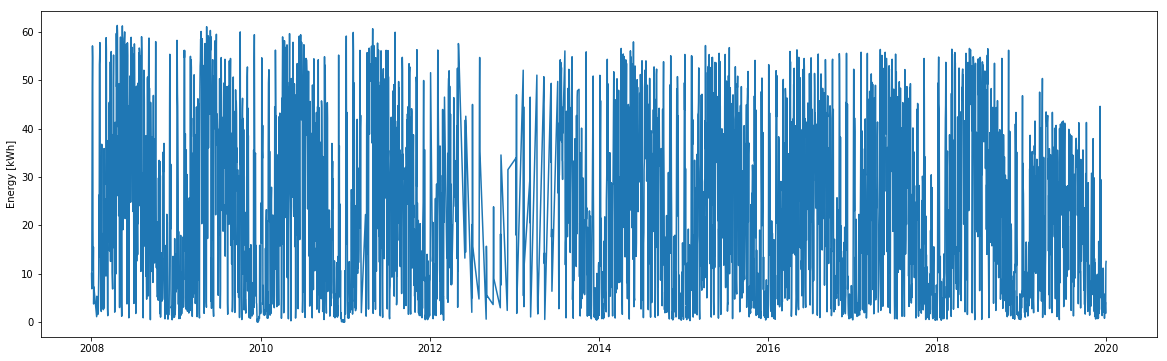

In [9]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=energy['Combined Data'])
ax.set(ylabel='Energy [kWh]')

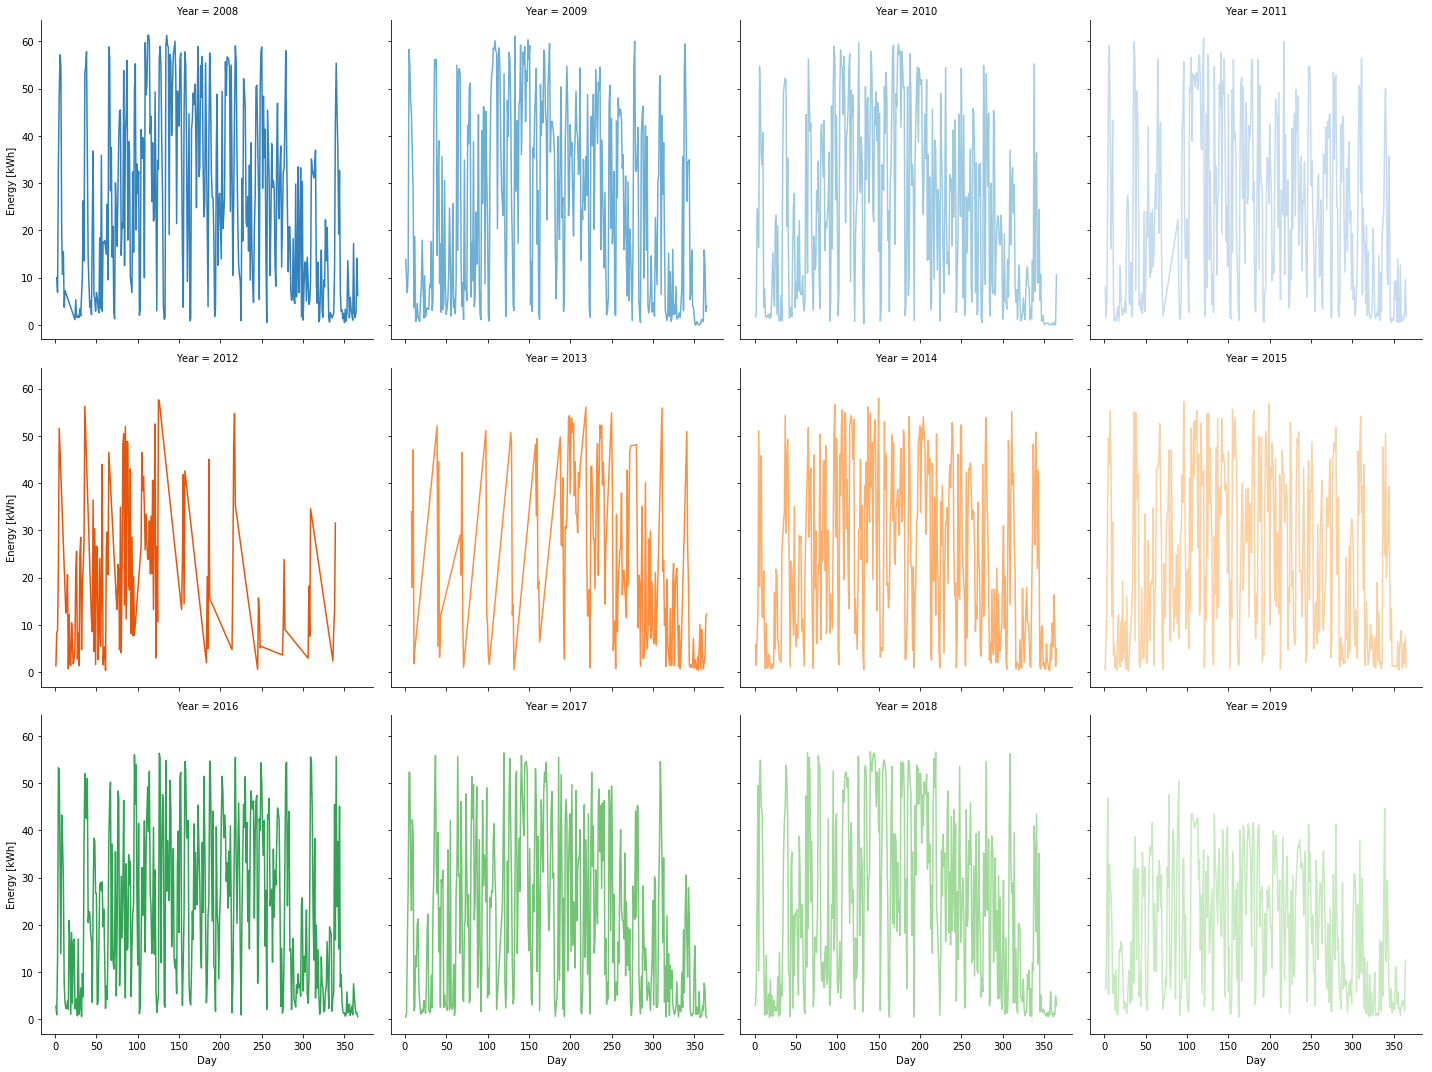

In [10]:
grid = sns.FacetGrid(energy, col="Year", hue="Year", palette="tab20c", col_wrap=4, height=5)
ax = grid.map(sns.lineplot, "Day", "Combined Data")
ax.set(ylabel='Energy [kWh]')